In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
path_to_source_files = 'D:/names/'

Задание 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000

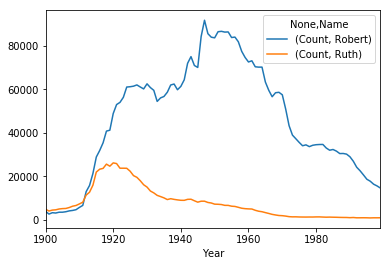

In [13]:
names_by_year = {}
for year in range(1900, 2000):
        source_file = os.path.join(path_to_source_files, 'yob{}.txt'.format(year))
        names_by_year[year] = pd.read_csv(
        source_file, names=['Name','Gender','Count'])
    
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
        
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

Задание 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

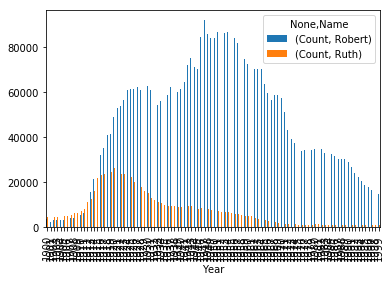

In [37]:
ax = name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(kind='bar', xticks = [x for x in range(1900, 2000, 5)])


Задание 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [75]:
year = '1950'
source_file = os.path.join(path_to_source_files, 'yob{}.txt'.format(year))   
df = pd.read_csv(source_file, names=['Name','Gender','Count'])
filtered = df[df['Name'].str.startswith('R')].sort_values(by=['Count'], ascending=False).head(10)
filtered.plot(kind='pie', y='Count', labels=filtered['Name'])

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


Задание 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

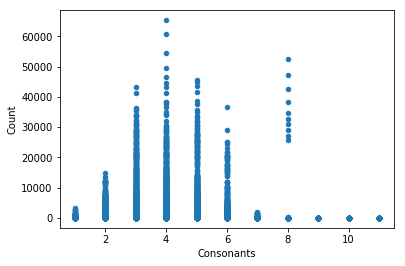

In [90]:
def count_cons(text):
    return len([c for c in text if c not in 'aeiou'])

names_by_year = {}
for year in range(1900, 2000):
        source_file = os.path.join(path_to_source_files, 'yob{}.txt'.format(year))
        names_by_year[year] = pd.read_csv(
        source_file, names=['Name','Gender','Count'])
    
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
        
names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
names_all['Consonants'] = names_all.apply(lambda row: len([c for c in row.Name if c not in 'aeiou']), axis=1)
names_all.plot.scatter(x='Consonants', y='Count')
